In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [3]:
heart_disease = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df = pd.DataFrame(heart_disease)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
hd_subset = df.sample(frac = 0.6)

In [8]:
# making contingency tables for all variables with HeartDiseaseorAttack and checking p-value
for column in hd_subset.loc[:, hd_subset.columns!='HeartDiseaseorAttack']:
    cont = pd.crosstab(hd_subset['HeartDiseaseorAttack'], hd_subset[column])
    test = chi2_contingency(cont) 
    print(test.pvalue)

0.0
0.0
8.16910624000198e-71
1.2164490566203146e-122
0.0
0.0
0.0
1.5423414863167748e-267
1.0425519011581964e-16
2.5751726609536632e-54
2.453379327432341e-30
3.2685930285334866e-15
2.1317512213418263e-32
0.0
1.21265693854065e-151
0.0
0.0
7.060475888752168e-247
0.0
0.0
0.0


In [10]:
tester = pd.crosstab(hd_subset['HeartDiseaseorAttack'], hd_subset['HighBP'])
tester

HighBP,0.0,1.0
HeartDiseaseorAttack,,
0.0,83524,54263
1.0,3595,10826


In [20]:
yes = tester.iloc[1,0]/tester.iloc[1,1]

In [21]:
no = tester.iloc[0,0]/tester.iloc[0,1]

In [18]:
stats.fisher_exact(tester)

SignificanceResult(statistic=4.6352868173056185, pvalue=0.0)

In [24]:
no/yes

4.635286817305619

In [32]:
pd.crosstab(hd_subset['HeartDiseaseorAttack'], hd_subset['Income'])

Income,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
HeartDiseaseorAttack,,,,,,,,
0.0,4852,5679,8156,10284,13616,19883,23920,51397
1.0,926,1336,1507,1708,1915,2209,2059,2761


In [33]:
df2 = heart_disease.drop(['Diabetes','GenHlth','Education','Income','MentHlth','PhysHlth', 'BMI', 'Age'],axis=1)

In [53]:
# odds ratio for heart disease
oddsratiolist = []
# iterating through the columns excluding heart disease
for column in df2.loc[:, df2.columns!='HeartDiseaseorAttack']:
    # making contingency table for variable and heart disease
    table = pd.crosstab(df2['HeartDiseaseorAttack'], df2[column])
    # getting odds ratio and p-value
    oddsratio, pval = stats.fisher_exact(table)
    # adding to list
    oddsratiolist.append([column, oddsratio, pval])

In [126]:
# converting to data frame
pd.DataFrame(oddsratiolist, columns=['Column', 'Odds Ratio', 'p-value']).sort_values(by='Odds Ratio', ascending = False)

,Column,Odds Ratio,p-value
4,Stroke,6.936202,0.000000e+00
0,HighBP,4.592099,0.000000e+00
11,DiffWalk,4.266085,0.000000e+00
2,CholCheck,3.635014,6.777325e-145
1,HighChol,3.589073,0.000000e+00
3,Smoker,2.203943,0.000000e+00
12,Sex,1.803161,0.000000e+00
10,NoDocbcCost,1.407146,4.851824e-51
9,AnyHealthcare,1.400159,1.152065e-22
6,Fruits,0.870471,3.495497e-23


In [57]:
oddsratiolst = []
for column in df2.loc[:, df2.columns!='HeartDiseaseorAttack']:
    table = pd.crosstab(df2['HeartDiseaseorAttack'], df2[column])
    rat = stats.contingency.odds_ratio(table)
    oddsratiolst.append(rat)

In [59]:
# individuals with high blood pressure are 4.592 times more susceptible to heart disease than those without
# high bp

In [68]:
# iterating through columns with nested for loop to get all possible combinations
# list of odds ratio
odds_rat = []
for i in df2:
    for j in df2:
        table = pd.crosstab(df2[i], df2[j])
        oddsratio, pval = stats.fisher_exact(table)
        odds_rat.append(oddsratio)

In [115]:
# reshaping into a matrix
odds = np.array(odds_rat).reshape(14,14)

In [121]:
# creating dataframe
odds = pd.DataFrame(odds, columns = df2.columns)
# replacing inf values with nan for better visualization
odds.replace(np.inf, np.nan, inplace = True)
odds = odds.set_index(df2.columns)
odds

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
HeartDiseaseorAttack,NaN,4.592099,3.589073,3.635014,2.203943,6.936202,0.535980,0.870471,0.727845,0.593841,1.400159,1.407146,4.266085,1.803161
HighBP,4.592099,NaN,3.475414,3.525254,1.483837,4.016704,0.557266,0.843913,0.730905,0.965680,1.450623,1.133721,3.401380,1.236544
HighChol,3.589073,3.475414,NaN,2.880588,1.450445,2.583564,0.694478,0.842662,0.814929,0.902862,1.509935,1.101274,2.169689,1.135523
CholCheck,3.635014,3.525254,2.880588,NaN,0.900379,2.602611,1.052201,1.289454,1.084009,0.636561,4.704903,0.441767,2.060325,0.792215
Smoker,2.203943,1.483837,1.450445,0.900379,NaN,1.861800,0.665221,0.723333,0.854558,2.453720,0.806333,1.421592,1.927796,1.462364
Stroke,6.936202,4.016704,2.583564,2.602611,1.861800,NaN,0.491360,0.870494,0.624904,0.639454,1.254037,1.685910,5.239774,1.030826
PhysActivity,0.535980,0.557266,0.694478,1.052201,0.665221,0.491360,NaN,1.955706,2.279299,1.137944,1.426854,0.623197,0.256489,1.165688
Fruits,0.870471,0.843913,0.842662,1.289454,0.723333,0.870494,1.955706,NaN,3.686065,0.734497,1.342611,0.725288,0.768728,0.683568
Veggies,0.727845,0.730905,0.814929,1.084009,0.854558,0.624904,2.279299,3.686065,NaN,1.285530,1.379318,0.757997,0.605677,0.718160
HvyAlcoholConsump,0.593841,0.965680,0.902862,0.636561,2.453720,0.639454,1.137944,0.734497,1.285530,NaN,0.822650,1.073953,0.599322,1.051359


In [97]:
import seaborn as sns

<Axes: >

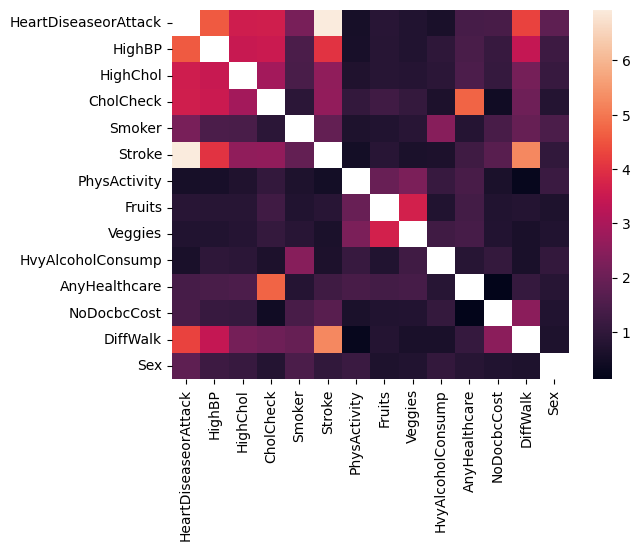

In [122]:
sns.heatmap(odds)